- Bài tập 2 - Mô hình hóa thống kê
- NHÓM 10
- Phạm Thị Hoà - 23C23007
- Trịnh Quang Trí - 23C23011

- Link data set: https://www.kaggle.com/datasets/uciml/autompg-dataset

In [1]:
#library(dplyr)
library(car)
library(MASS)
library(caret)
library(magrittr)
library(ggplot2)
options(warn = -1)
set.seed(42)

Loading required package: carData

Loading required package: ggplot2

Loading required package: lattice



In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [3]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "data/wines.csv", sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ";")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)


,alcohol,malic.acid,ash,ash.alkalinity,magnesium,tot..phenols,flavonoids,non.flav..phenols,proanth,col..int.,col..hue,OD.ratio,proline,vintages
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Barolo
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Barolo
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Barolo
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Barolo
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,Barolo
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,Barolo


### THÔNG TIN CỦA BỘ DỮ LIỆU
- alcohol: Hàm lượng cồn trong rượu.
- malic.acid: Lượng axit malic trong rượu.
- ash: Hàm lượng tro trong rượu.
- ash.alkalinity: Độ kiềm của tro trong rượu.
- magnesium: Hàm lượng magiê trong rượu.
- tot..phenols: Tổng hàm lượng phenol trong rượu.
- flavonoids: Lượng flavonoid trong rượu.
- non.flav..phenols: Hàm lượng phenol không flavonoid trong rượu.
- proanth: Hàm lượng proanthocyanin trong rượu.
- col..int.: Độ đậm màu của rượu.
- col..hue: Sắc độ của rượu.
- OD.ratio: Tỷ lệ mật độ quang học.
- proline: Hàm lượng proline trong rượu.
- vintages: Các loại rượu (hoặc nhóm rượu).

### CHỌN BIẾN PHỤ THUỘC
- Trong bài toán này sẽ xây dựng mô hình dự đoán hàm lượng cồn (alcohol) dựa trên các đặc điểm khác của rượu. Do đó, chọn cột alcohol làm biến phụ thuộc (biến y)

In [4]:
# Kiểm tra số dòng và số cột của dữ liệu:
dim(df)

[1] 177  14

- Bộ dữ liệu có 177 dòng và 14 cột

In [5]:
# Kiểm tra dữ liệu
str(df) # Xem cấu trúc dữ liệu


'data.frame':	177 obs. of  14 variables:
 $ alcohol          : num  13.2 13.2 14.4 13.2 14.2 ...
 $ malic.acid       : num  1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 ...
 $ ash              : num  2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 2.3 ...
 $ ash.alkalinity   : num  11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 18 ...
 $ magnesium        : int  100 101 113 118 112 96 121 97 98 105 ...
 $ tot..phenols     : num  2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 2.95 ...
 $ flavonoids       : num  2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 3.32 ...
 $ non.flav..phenols: num  0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 0.22 ...
 $ proanth          : num  1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 2.38 ...
 $ col..int.        : num  4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 5.75 ...
 $ col..hue         : num  1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 1.25 ...
 $ OD.ratio         : num  3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 3.17 ...
 $ proline          : int  1050 1185 1480 735

- Ngoại trừ cột vintages (mô tả các loại rượu - hay nhóm rượu theo loại nho) là biến định tính đang có kiểu dữ liệu chr, toàn bộ các cột khác của dữ liệu đều có kiểu dữ liệu dạng số

In [6]:
summary(df)

    alcohol        malic.acid        ash        ash.alkalinity 
 Min.   :11.03   Min.   :0.74   Min.   :1.360   Min.   :10.60  
 1st Qu.:12.36   1st Qu.:1.60   1st Qu.:2.210   1st Qu.:17.20  
 Median :13.05   Median :1.87   Median :2.360   Median :19.50  
 Mean   :12.99   Mean   :2.34   Mean   :2.366   Mean   :19.52  
 3rd Qu.:13.67   3rd Qu.:3.10   3rd Qu.:2.560   3rd Qu.:21.50  
 Max.   :14.83   Max.   :5.80   Max.   :3.230   Max.   :30.00  
   magnesium       tot..phenols     flavonoids    non.flav..phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300   
 1st Qu.: 88.00   1st Qu.:1.740   1st Qu.:1.200   1st Qu.:0.2700   
 Median : 98.00   Median :2.350   Median :2.130   Median :0.3400   
 Mean   : 99.59   Mean   :2.292   Mean   :2.023   Mean   :0.3623   
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.860   3rd Qu.:0.4400   
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600   
    proanth        col..int.         col..hue        OD.ratio    
 Min.   :0

- Biến proline có phạm vi giá trị từ 278 đến 1680, đây là một phạm vi khá rộng so với hầu hết các biến khác trong tập dữ liệu.

In [7]:
# Kiểm tra dữ liệu unique của bộ dữ liệu
for (col in colnames(df)) {
    print(col)
    print(length(unique(df[[col]])))
}


[1] "alcohol"
[1] 125
[1] "malic.acid"
[1] 133
[1] "ash"
[1] 78
[1] "ash.alkalinity"
[1] 62
[1] "magnesium"
[1] 52
[1] "tot..phenols"
[1] 97
[1] "flavonoids"
[1] 131
[1] "non.flav..phenols"
[1] 39
[1] "proanth"
[1] 101
[1] "col..int."
[1] 131
[1] "col..hue"
[1] 78
[1] "OD.ratio"
[1] 121
[1] "proline"
[1] 121
[1] "vintages"
[1] 3


### NHẬN XÉT VỀ DỮ LIỆU:
- Cột vintages có 3 giá trị unique, đúng với nhận định ban đầu thì đây là một biến phân loại, vì bài phân tích này sẽ áp dụng bài toán hồi quy chính tắc, nên ta chỉ giữ lại những biến định lượng.
- Do đó chúng ta sẽ loại biến vintages này ra khỏi bộ dữ liệu trước khi phân tích

In [8]:
# Loại cột vintages
df <- subset(df, select = -vintages)

In [9]:
# Kiểm tra giá trị thiếu
data.frame(colSums(is.na(df)))


,colSums.is.na.df..
,<dbl>
alcohol,0
malic.acid,0
ash,0
ash.alkalinity,0
magnesium,0
tot..phenols,0
flavonoids,0
non.flav..phenols,0
proanth,0


- Trong bộ dữ liệu này không có giá trị bị thiếu

### XỬ LÝ BIẾN LIÊN TỤC

In [10]:
list_ltuc = colnames(df)

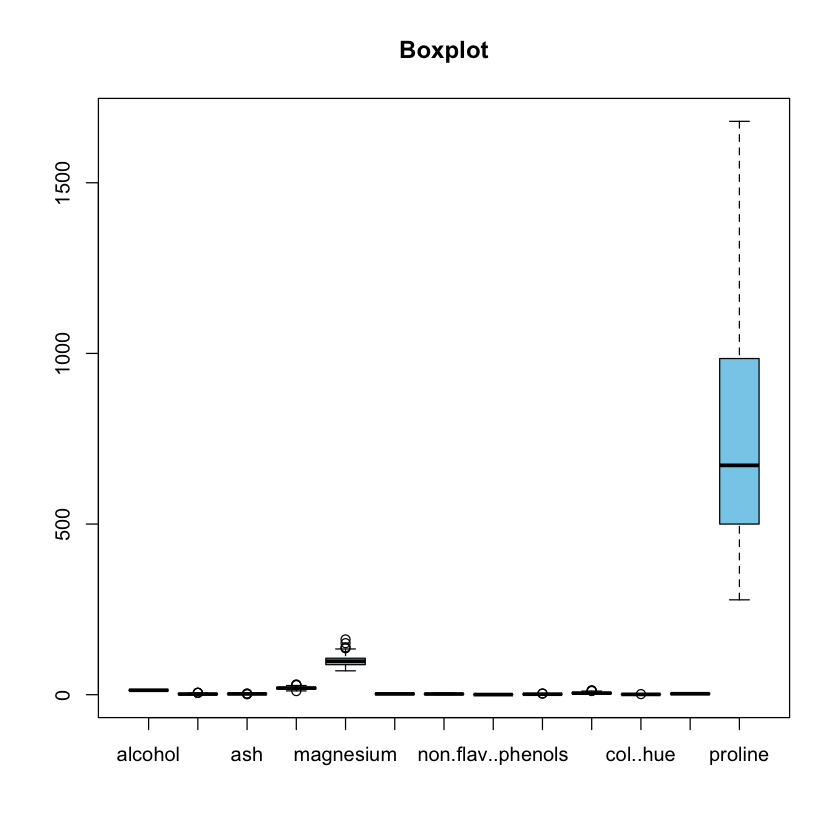

In [11]:

boxplot(df, col = "skyblue", main = "Boxplot")

- Rõ ràng để nhận thấy rằng biến proline có giá trị lớn nhất trong tất cả các biến, điều này có thể làm cho nó có tác động lớn hơn trong các mô hình phân tích nếu không được chuẩn hóa hoặc chuẩn hóa đúng cách.

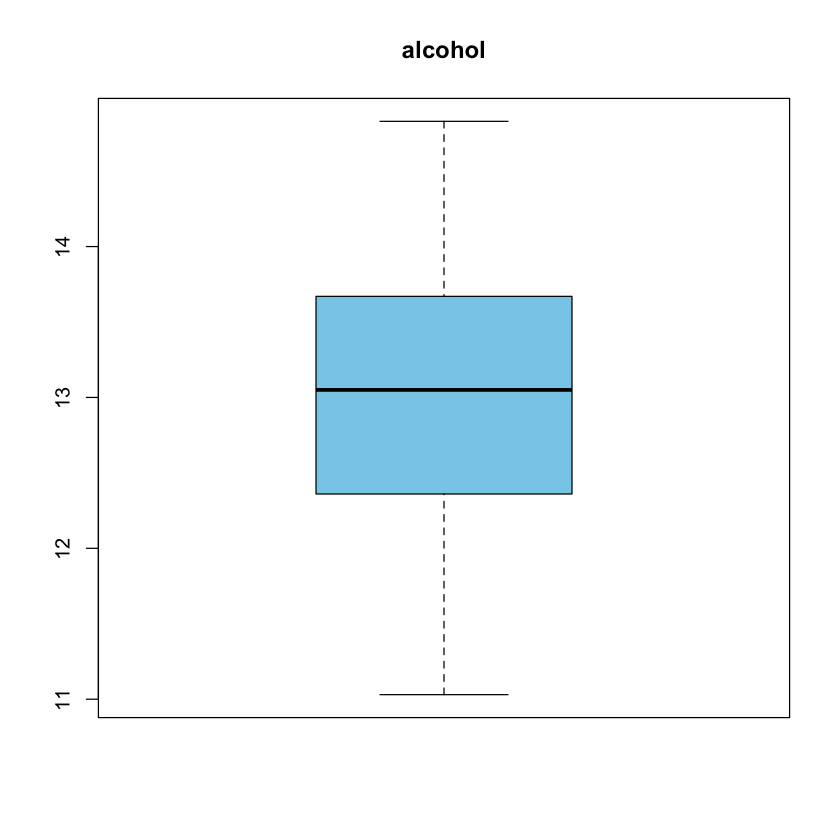

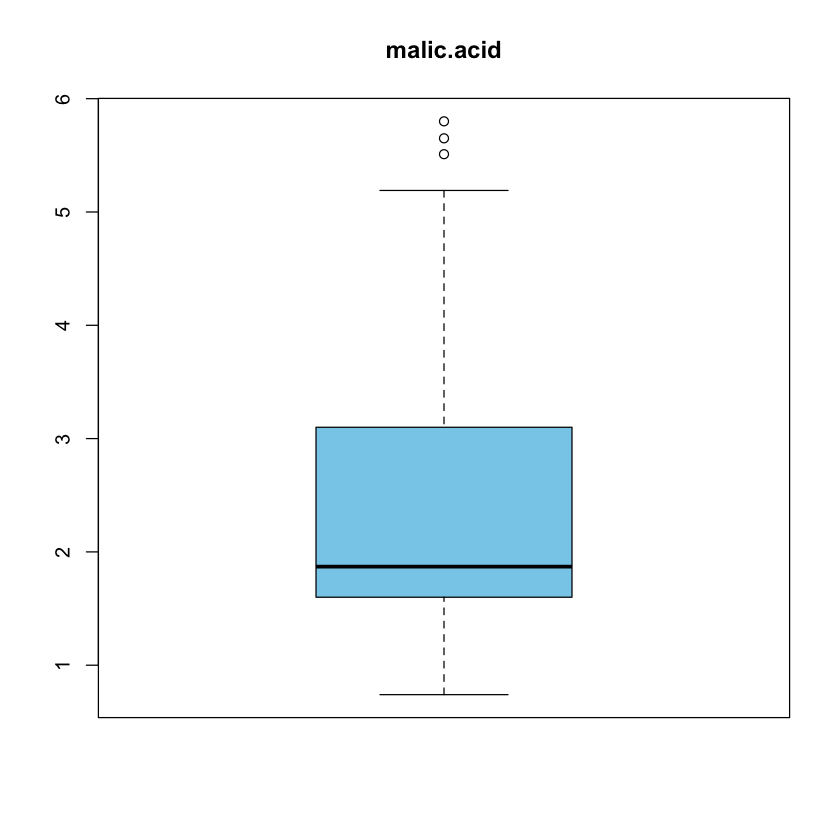

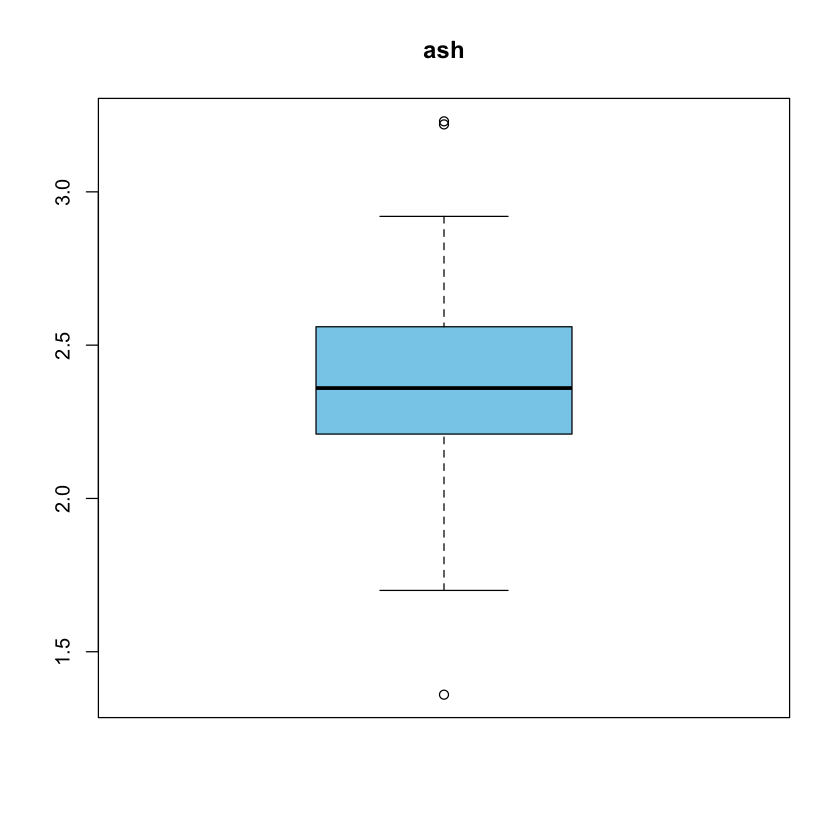

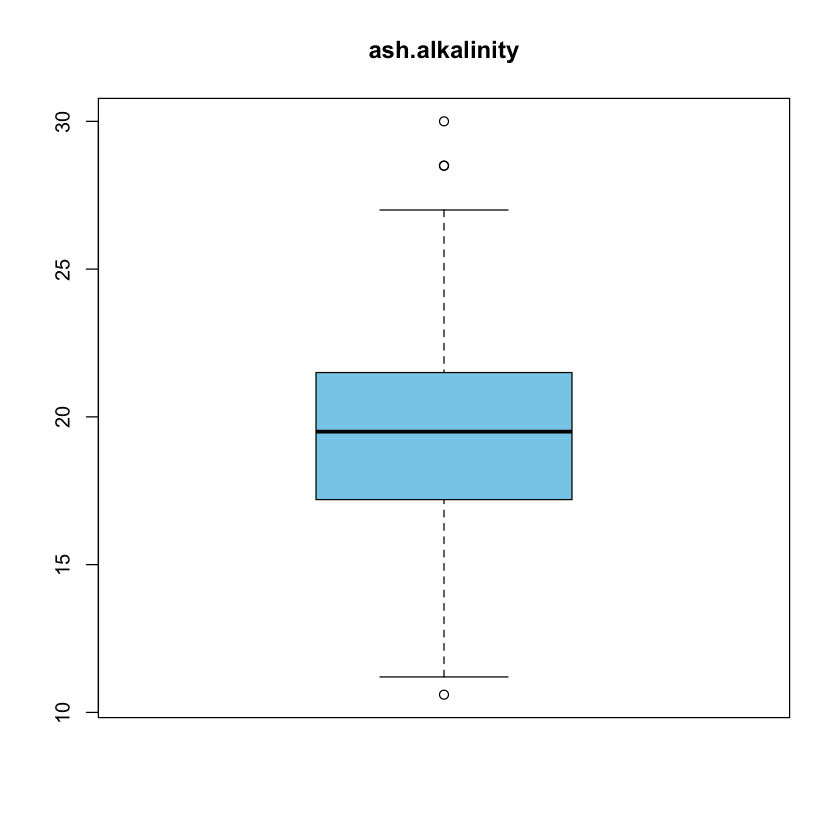

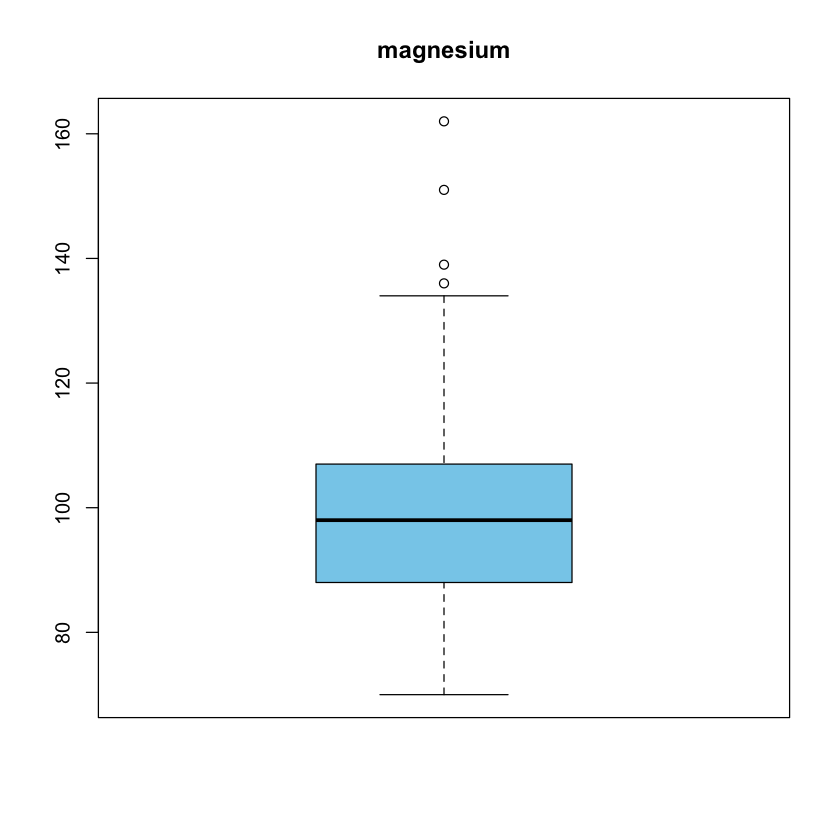

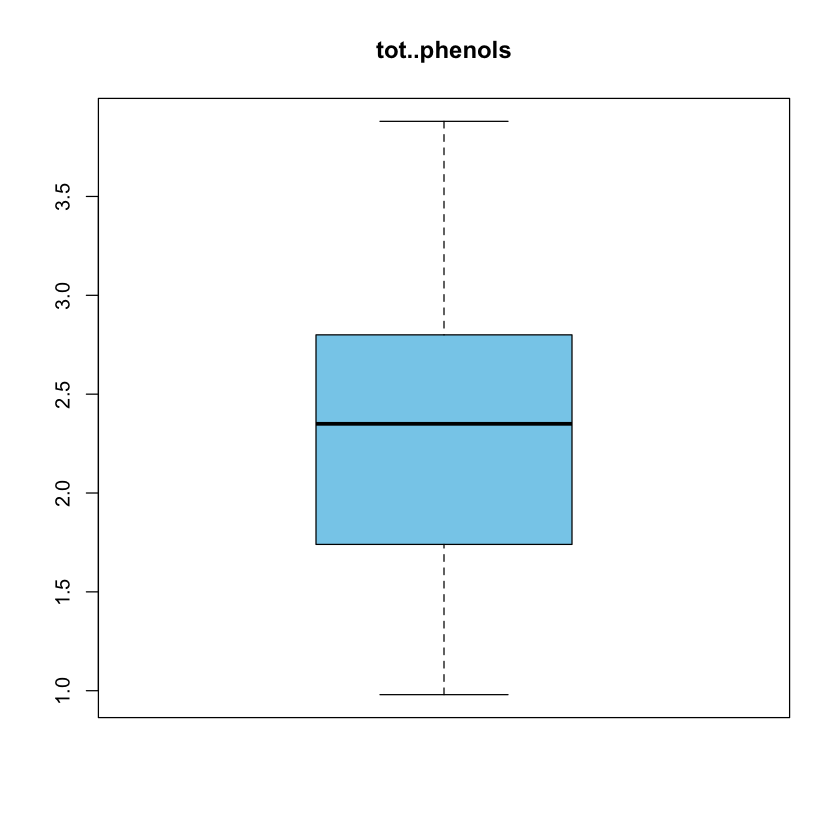

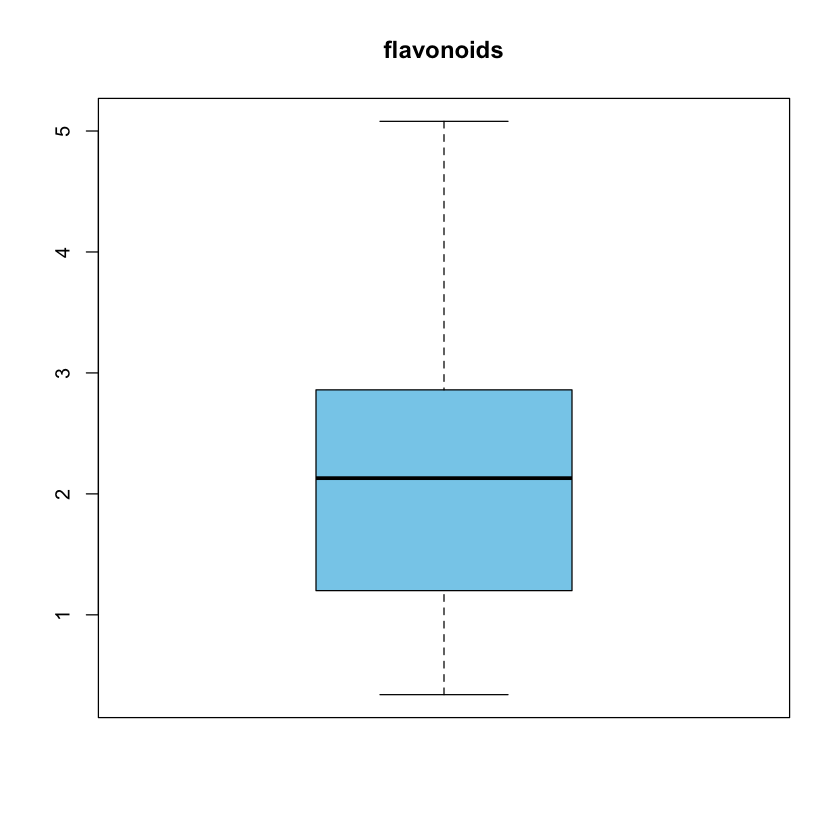

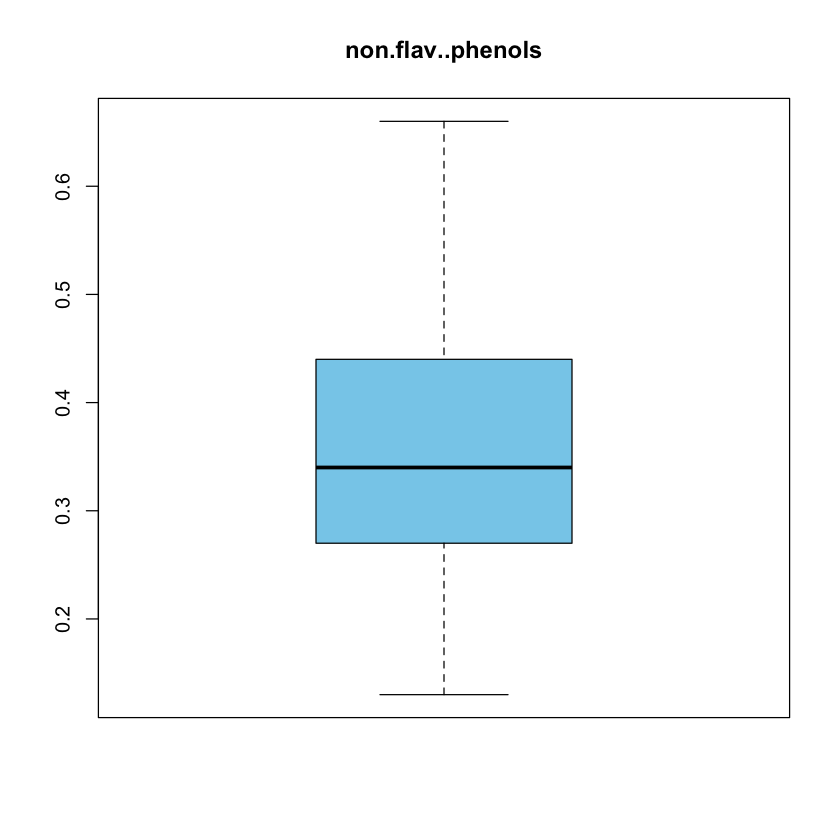

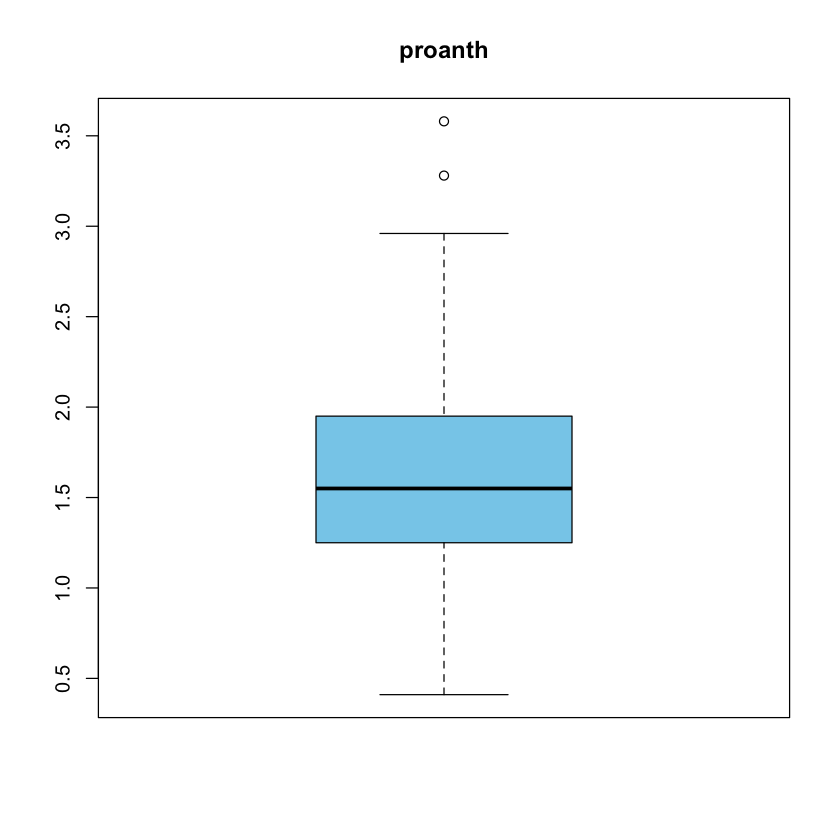

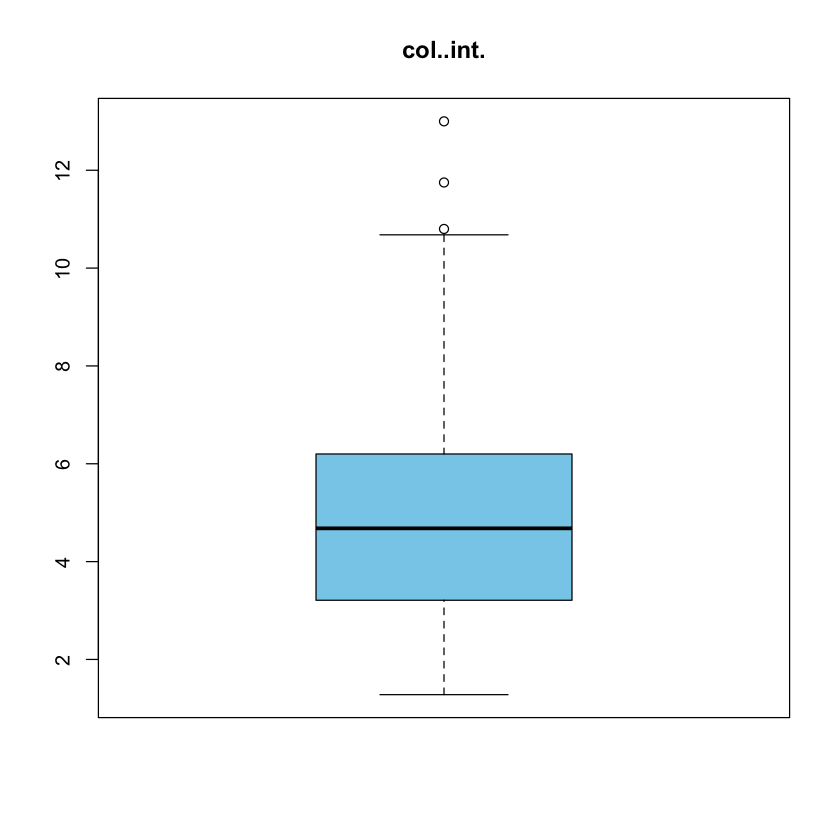

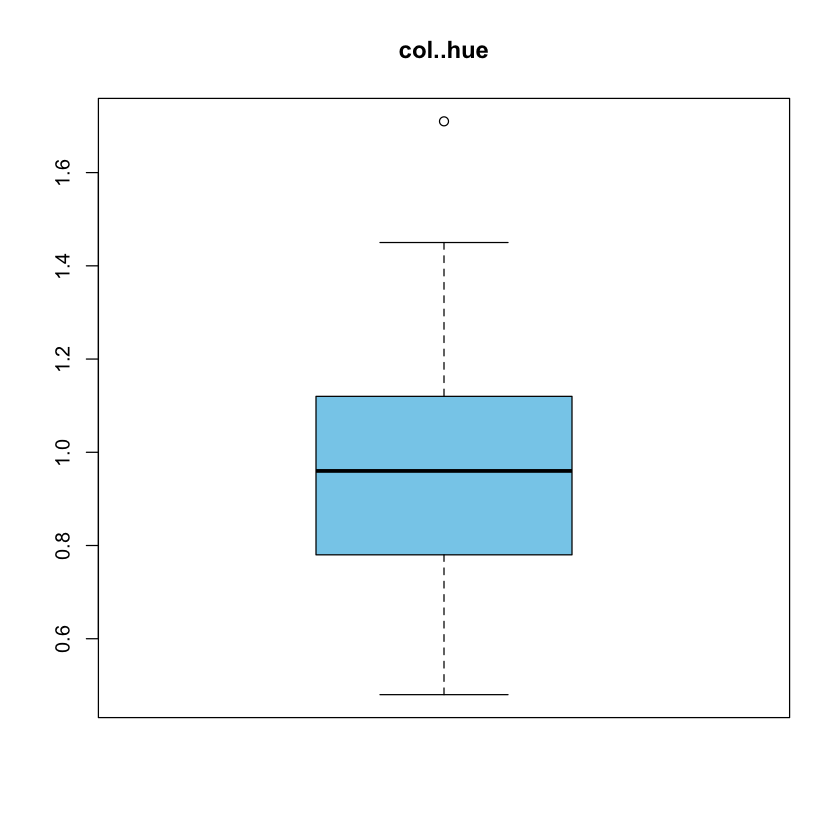

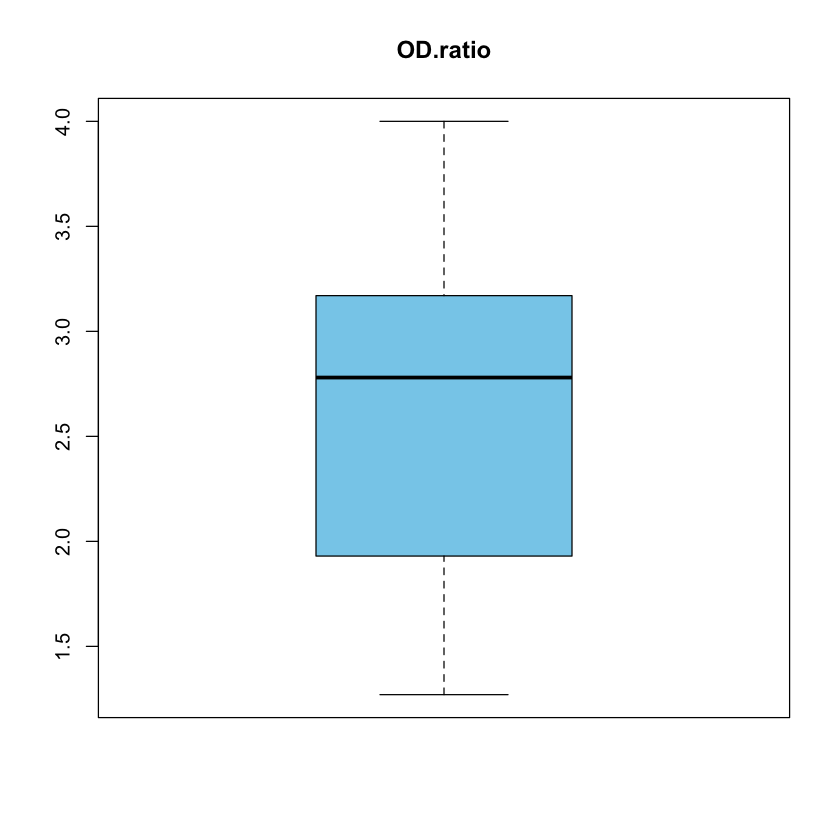

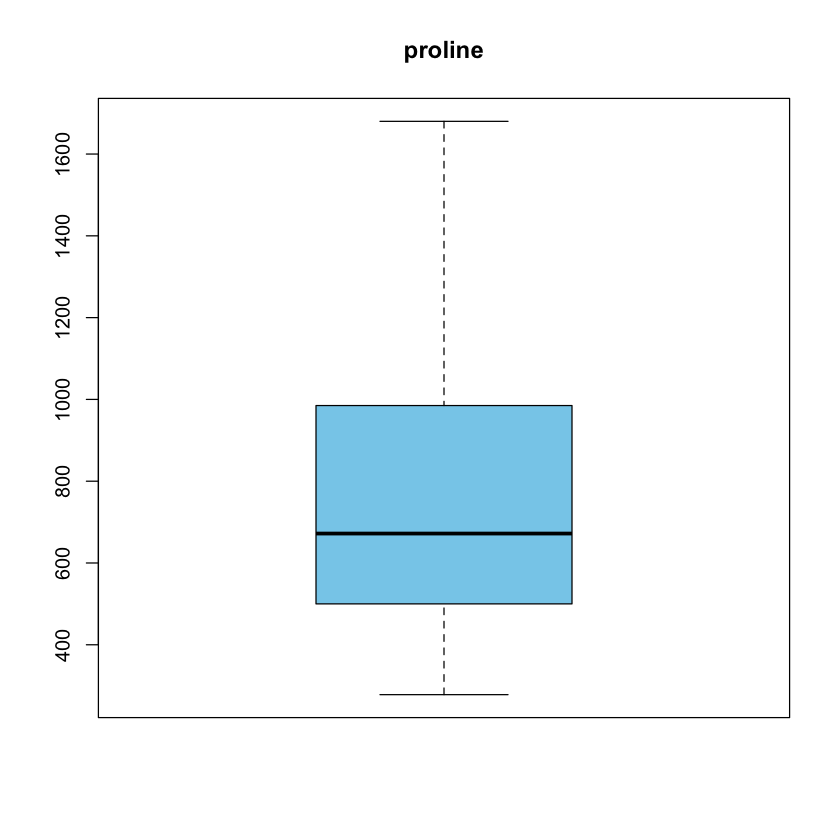

In [12]:
# Vẽ Boxplot cho từng biến trên riêng biểu đồ:
for (col in list_ltuc) {
    boxplot(df[[col]], col = "skyblue", main = col)
}


- Dữ liệu tồn tại giá trị ngoại lai ở các biến: malic.acid,col..int.,proanth,  col..hue, magnesium, ash.alkalinity và ash.

In [13]:
# Lưu tất cả dữ liệu ngoại lai vào outlier_df
outlier_df <- data.frame()
for (col in list_ltuc) {
    Q1 <- quantile(df[[col]], 0.25)
    Q3 <- quantile(df[[col]], 0.75)
    IQR <- Q3 - Q1
    outliers <- df[df[[col]] < (Q1 - 1.5 * IQR) | df[[col]] > (Q3 + 1.5 * IQR), ]
    n_out <- nrow(outliers)
    print(paste("So outlier cua cot ", col, ": ", n_out))
    outlier_df <- rbind(outlier_df, outliers)
}
print(paste("Tong so outlier cua df: ", nrow(unique(outlier_df))))


[1] "So outlier cua cot  alcohol :  0"
[1] "So outlier cua cot  malic.acid :  3"
[1] "So outlier cua cot  ash :  3"
[1] "So outlier cua cot  ash.alkalinity :  4"
[1] "So outlier cua cot  magnesium :  4"
[1] "So outlier cua cot  tot..phenols :  0"
[1] "So outlier cua cot  flavonoids :  0"
[1] "So outlier cua cot  non.flav..phenols :  0"
[1] "So outlier cua cot  proanth :  2"
[1] "So outlier cua cot  col..int. :  3"
[1] "So outlier cua cot  col..hue :  1"
[1] "So outlier cua cot  OD.ratio :  0"
[1] "So outlier cua cot  proline :  0"
[1] "Tong so outlier cua df:  16"


In [14]:
# Xem các dòng có giá trị ngoại lai
outlier_df = unique(outlier_df)
outlier_df

,alcohol,malic.acid,ash,ash.alkalinity,magnesium,tot..phenols,flavonoids,non.flav..phenols,proanth,col..int.,col..hue,OD.ratio,proline
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718


- Có toàn bộ 16 dòng có outlier trong toàn bộ dữ liệu, chiếm 16/177*100 = 9%, với tỉ lệ này => Ta có thể loại bỏ các dòng outlier này ra khỏi bộ dữ liệu 

In [15]:
# Loại bỏ dữ liệu ngoại lai:
# Lấy các chỉ số hàng có outlier
outlier_indices = as.numeric(rownames(outlier_df))
# outlier_indices
df <- df[-outlier_indices, ]
dim(df)

[1] 161  13

In [16]:
# Ma trận tương quan R của dữ liệu
R <- cor(df[,list_ltuc])
R

,alcohol,malic.acid,ash,ash.alkalinity,magnesium,tot..phenols,flavonoids,non.flav..phenols,proanth,col..int.,col..hue,OD.ratio,proline
alcohol,1.000000000,0.09744154,0.22309313,-0.34727576,0.408468868,0.33237305,0.3079631,-0.17489425,0.22673547,0.54721669,-0.002200486,0.097730236,0.6577031
malic.acid,0.097441542,1.00000000,0.18465063,0.30893361,0.038339442,-0.36873639,-0.4587821,0.29904280,-0.24010296,0.30115135,-0.582330810,-0.398357913,-0.1823202
ash,0.223093131,0.18465063,1.00000000,0.31747557,0.424384191,0.10468654,0.0425521,0.09150493,0.02919069,0.21008760,-0.043222387,-0.036125229,0.2669047
ash.alkalinity,-0.347275756,0.30893361,0.31747557,1.00000000,-0.163848006,-0.46221951,-0.5147094,0.33945281,-0.32882769,-0.04622506,-0.326918484,-0.368206608,-0.4881989
magnesium,0.408468868,0.03833944,0.42438419,-0.16384801,1.000000000,0.23289506,0.1891599,-0.23137624,0.08349848,0.34931642,-0.025474279,-0.003974695,0.4401425
tot..phenols,0.332373050,-0.36873639,0.10468654,-0.46221951,0.232895062,1.00000000,0.8840622,-0.49706861,0.64743356,-0.05523135,0.476348740,0.704923867,0.5238558
flavonoids,0.307963087,-0.45878209,0.04255210,-0.51470943,0.189159903,0.88406217,1.0000000,-0.59665382,0.74025999,-0.15979322,0.593626111,0.781891267,0.5321454
non.flav..phenols,-0.174894248,0.29904280,0.09150493,0.33945281,-0.231376244,-0.49706861,-0.5966538,1.00000000,-0.42746567,0.10703827,-0.281059372,-0.525582967,-0.3104179
proanth,0.226735467,-0.24010296,0.02919069,-0.32882769,0.083498476,0.64743356,0.7402600,-0.42746567,1.00000000,-0.02399232,0.354222304,0.574260673,0.3882424
col..int.,0.547216692,0.30115135,0.21008760,-0.04622506,0.349316415,-0.05523135,-0.1597932,0.10703827,-0.02399232,1.00000000,-0.474150050,-0.427586612,0.3694252


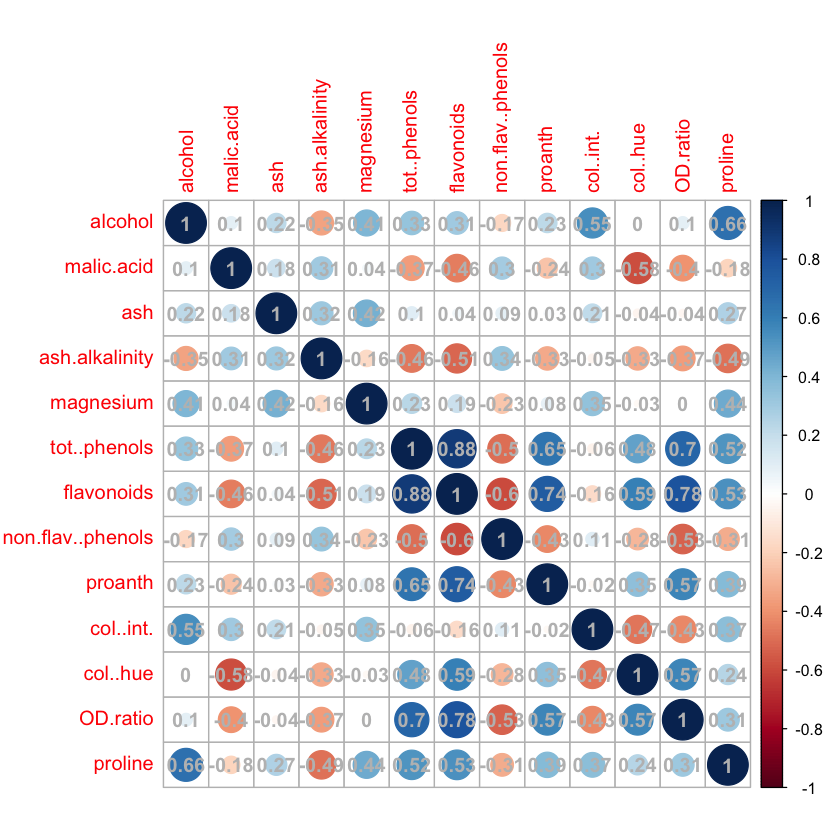

In [17]:
corrplot::corrplot(cor(df), addCoef.col = "grey")

- Biến alcohol có mối tương quan mạnh nhất với proline (0.6577), điều này cho thấy khi hàm lượng proline trong rượu tăng, hàm lượng cồn cũng có xu hướng tăng.
- Có mối tương quan đáng kể giữa alcohol và một số biến khác như col..int., magnesium, tot..phenols, và flavonoids.
- Biến alcohol có mối tương quan âm với ash.alkalinity và non.flav..phenols.
- Một số biến như col..hue, malic.acid và OD.ratio có mối tương quan rất yếu hoặc gần như không có với alcohol.

### CHIA BỘ DỮ LIỆU THÀNH TRAIN - TEST DATA

In [18]:
## Phân chia bộ dữ liệu thành 2 tập train.data và test.data
set.seed(42)
sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.8,0.2))
train.data  <- df[sample, ]
test.data   <- df[!sample, ]
dim(train.data)
dim(test.data)

[1] 125  13

[1] 36 13

## PCA

In [19]:
# Loại alcohol:
X = subset(train.data, select = -c(alcohol))

In [20]:
pca <- princomp(X, cor = TRUE, fix_sign = TRUE)
summary(pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.1950263 1.5174565 1.0831016 0.95595607 0.86866573
Proportion of Variance 0.4015117 0.1918895 0.0977591 0.07615433 0.06288168
Cumulative Proportion  0.4015117 0.5934012 0.6911603 0.76731468 0.83019635
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.73187305 0.63040569 0.59057164 0.52027436 0.48286690
Proportion of Variance 0.04463651 0.03311761 0.02906457 0.02255712 0.01943004
Cumulative Proportion  0.87483287 0.90795048 0.93701505 0.95957217 0.97900221
                          Comp.11     Comp.12
Standard deviation     0.42342059 0.269608123
Proportion of Variance 0.01494042 0.006057378
Cumulative Proportion  0.99394262 1.000000000

- Thành phần chính đầu tiên (Comp.1): Giải thích 40.15% phương sai của dữ liệu, là thành phần quan trọng nhất.
- Thành phần chính thứ hai (Comp.2): Giải thích thêm 19.19% phương sai, nâng tổng tỷ lệ tích lũy lên 59.34%.
- Thành phần chính thứ ba (Comp.3): Giải thích thêm 9.78% phương sai, nâng tổng tỷ lệ tích lũy lên 69.12%.
- Các thành phần còn lại (Comp.4 đến Comp.12): Mỗi thành phần giải thích một tỷ lệ phương sai ngày càng nhỏ hơn, với tất cả các thành phần kết hợp lại giải thích toàn bộ phương sai của dữ liệu (100%).

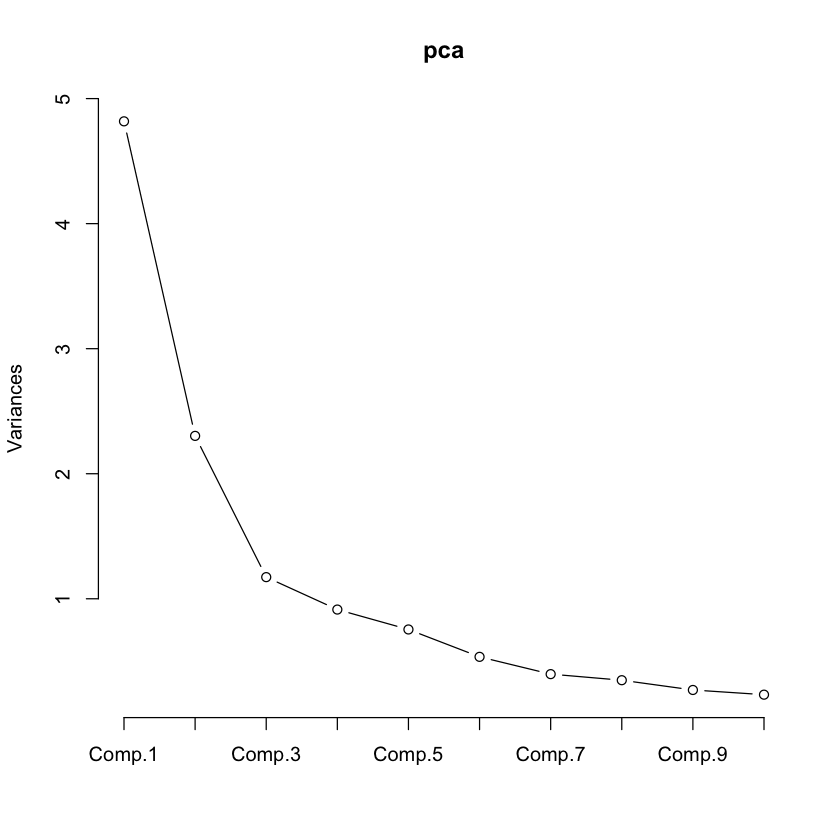

In [21]:
#### Plot of variances of each component (screeplot)
plot(pca, type = "l")

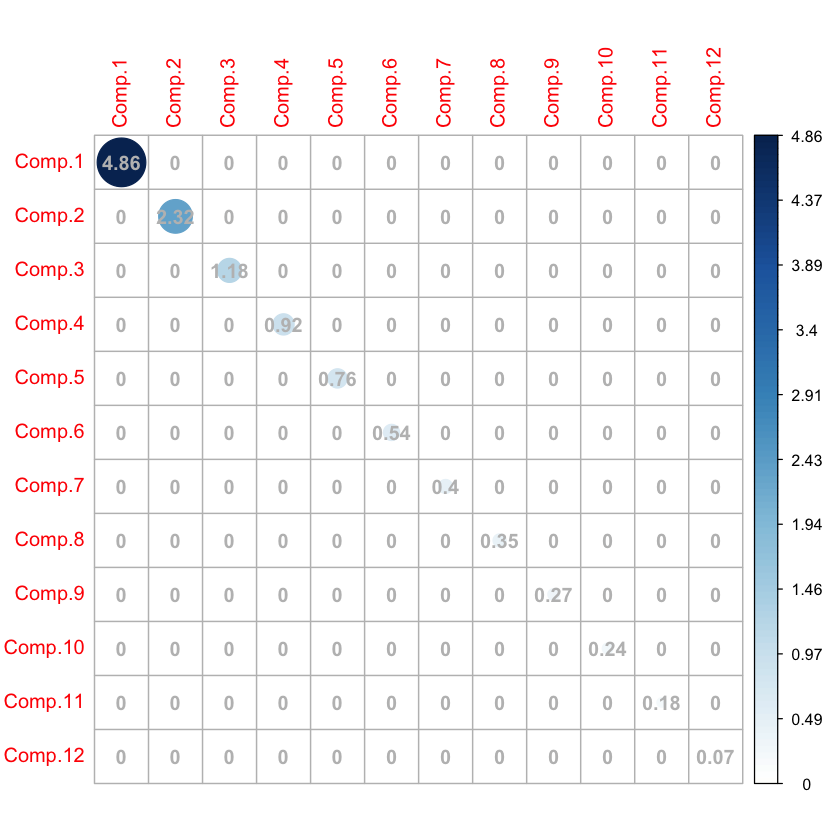

In [22]:
corrplot::corrplot(cov(pca$scores), addCoef.col = "gray", is.corr = FALSE)

In [23]:
 # The eigenvectors (the a_j vectors) are the column vectors in $loadings
A = pca$loadings
A


Loadings:
                  Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
malic.acid         0.234  0.235  0.244  0.565         0.616         0.265
ash                       0.405  0.574 -0.341 -0.245         0.146 -0.141
ash.alkalinity     0.277         0.612               -0.386         0.140
magnesium                 0.487        -0.315  0.439  0.238 -0.536 -0.160
tot..phenols      -0.399                0.163                0.130 -0.478
flavonoids        -0.434                0.125                      -0.145
non.flav..phenols  0.308                      -0.704  0.247 -0.347 -0.396
proanth           -0.321         0.220  0.459 -0.157 -0.300 -0.590  0.220
col..int.          0.104  0.519 -0.295  0.180 -0.171 -0.404              
col..hue          -0.311 -0.254        -0.378 -0.246  0.234 -0.223  0.495
OD.ratio          -0.380 -0.157  0.225  0.120         0.192  0.225 -0.158
proline           -0.250  0.406 -0.189 -0.130 -0.354         0.305  0.368
                  Comp.9 Co

- Thành phần chính 1 và 2: Chủ yếu bị ảnh hưởng bởi các biến ash, magnesium và col..int..
- Thành phần chính 3: Bị ảnh hưởng nhiều bởi ash.alkalinity và col..int..
- Thành phần chính 4 và 5: Có sự đóng góp đáng kể từ malic.acid và non.flav..phenols.
- Các thành phần chính này giúp giảm số chiều của dữ liệu trong khi vẫn giữ lại phần lớn thông tin quan trọng, và các tải trọng cho thấy mức độ ảnh hưởng của từng biến đối với mỗi thành phần chính.

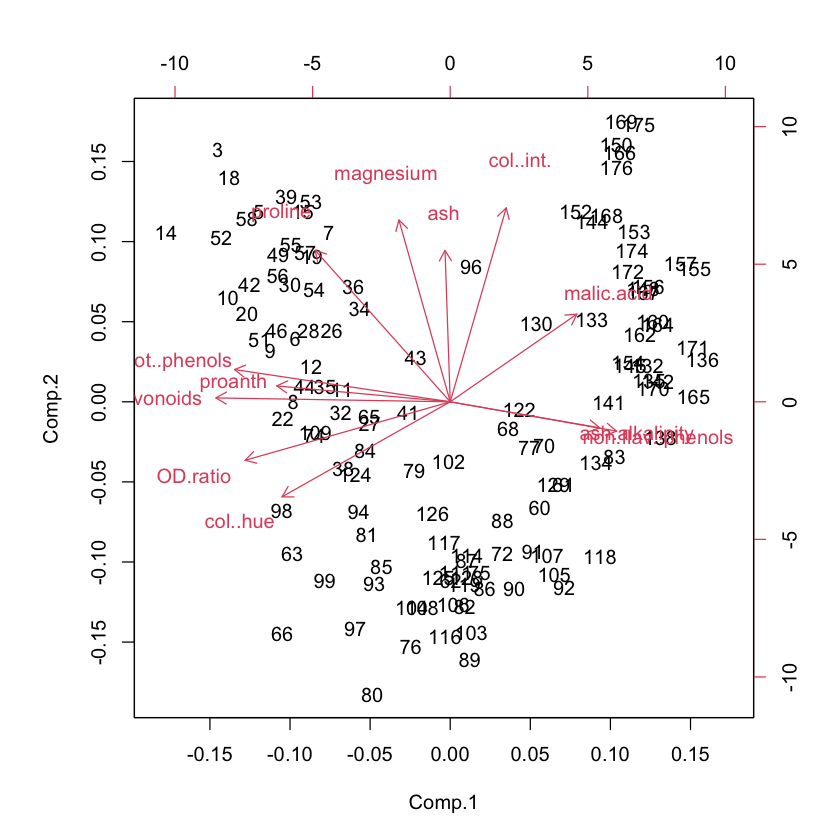

In [24]:
biplot(pca)

In [25]:
head(sweep(pca$scores %*% t(pca$loadings), 2, pca$center, "+") )

,malic.acid,ash,ash.alkalinity,magnesium,tot..phenols,flavonoids,non.flav..phenols,proanth,col..int.,col..hue,OD.ratio,proline
3,1.958660,3.026429,18.50277,99.09135,4.738288,3.525217,-0.60839430,2.830249,6.231213,0.5433172,3.806981,744.1626
5,1.773636,2.807529,17.97134,99.01026,3.832834,3.422855,0.19672064,2.405625,5.773144,1.4248597,2.956503,744.0711
6,1.880755,2.807529,17.77205,97.71285,2.630765,2.532303,-0.12532533,2.425845,5.118760,1.2856688,3.991252,743.5833
7,2.153423,3.508010,18.76848,99.74005,2.786878,2.522067,-0.04481384,0.949772,5.031509,1.4712567,3.991252,743.5985
8,1.656778,1.581686,17.57276,97.79394,3.099104,3.003169,-0.20583683,2.425845,5.096948,1.5640507,2.956503,742.8362
9,1.374372,2.019487,18.23705,97.87503,3.380107,3.177185,-0.76941729,2.162983,5.978184,1.2392718,3.948728,742.8362


In [26]:
# Tạo tập dữ liệu mới, bao gộm cột alcohol và  principal components
winesPCA <- data.frame("alcohol" = train.data$alcohol, pca$scores)

In [27]:
# Mô hình với đầy đủ các principal components
modPCA <- lm(alcohol ~ ., data = winesPCA)
summary(modPCA)


Call:
lm(formula = alcohol ~ ., data = winesPCA)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.42072 -0.28481 -0.00625  0.27469  1.35649 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.98520    0.04325 300.240  < 2e-16 ***
Comp.1      -0.11402    0.01970  -5.787 6.63e-08 ***
Comp.2       0.33128    0.02850  11.623  < 2e-16 ***
Comp.3      -0.17784    0.03993  -4.454 2.01e-05 ***
Comp.4       0.05016    0.04524   1.109   0.2699    
Comp.5      -0.13558    0.04979  -2.723   0.0075 ** 
Comp.6       0.04821    0.05909   0.816   0.4163    
Comp.7       0.13462    0.06861   1.962   0.0522 .  
Comp.8       0.12647    0.07323   1.727   0.0869 .  
Comp.9       0.05258    0.08313   0.633   0.5283    
Comp.10     -0.16510    0.08957  -1.843   0.0679 .  
Comp.11     -0.21433    0.10214  -2.098   0.0381 *  
Comp.12      0.32444    0.16042   2.022   0.0455 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard err

- Multiple R-squared: 0.6594: Điều này có nghĩa là 65.94% phương sai trong hàm lượng cồn (alcohol) được giải thích bởi mô hình này.
- Adjusted R-squared: 0.6229: Điều này điều chỉnh cho số lượng biến độc lập và cho thấy rằng 62.29% phương sai được giải thích khi tính đến số lượng thành phần chính.
- Với mức ý nghĩa alpha = 0.05:
    - Các thành phần chính quan trọng: Các thành phần chính như Comp.1, Comp.2, Comp.3, Comp.5, Comp.11, và Comp.12 có ý nghĩa thống kê và đóng góp quan trọng vào mô hình.
    - Các thành phần không quan trọng: Các thành phần chính như Comp.4, Comp.6, Comp.7, Comp.8, Comp.9, Comp.10, không có ý nghĩa thống kê, cho thấy chúng không đóng góp nhiều vào việc giải thích hàm lượng cồn trong rượu vang.

In [28]:
car::vif(modPCA)

Comp.1  Comp.2  Comp.3  Comp.4  Comp.5  Comp.6  Comp.7  Comp.8  Comp.9 Comp.10 
      1       1       1       1       1       1       1       1       1       1 
Comp.11 Comp.12 
      1       1

- Hoàn toàn không tồn tại hiện tượng đa cộng tuyến

In [29]:
# Mô hình chỉ sử dụng 3 thành phần chính Comp.1 + Comp.2 + Comp.3:
modPCA3 <- lm(alcohol ~ Comp.1 + Comp.2 + Comp.3, data = winesPCA) 
summary(modPCA3)


Call:
lm(formula = alcohol ~ Comp.1 + Comp.2 + Comp.3, data = winesPCA)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32170 -0.30143 -0.02387  0.31310  1.31631 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.98520    0.04659 278.692  < 2e-16 ***
Comp.1      -0.11402    0.02123  -5.371 3.84e-07 ***
Comp.2       0.33128    0.03070  10.789  < 2e-16 ***
Comp.3      -0.17784    0.04302  -4.134 6.60e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5209 on 121 degrees of freedom
Multiple R-squared:  0.573,	Adjusted R-squared:  0.5624 
F-statistic: 54.12 on 3 and 121 DF,  p-value: < 2.2e-16


- Multiple R-squared: 0.5955: Điều này có nghĩa là 59.55% phương sai trong hàm lượng cồn (alcohol) được giải thích bởi mô hình này.
- F-statistic: 44.17 trên 4 và 120 DF, p-value: < 2.2e-16: Giá trị F và p-value rất thấp cho thấy rằng mô hình tổng thể có ý nghĩa thống kê cao.
- Các thành phần chính quan trọng: Các thành phần chính như Comp.1, Comp.2, Comp.3 và Comp.5 đều có ý nghĩa thống kê, cho thấy chúng đóng góp quan trọng vào mô hình.

In [30]:
alpha <- modPCA3$coefficients
alpha

(Intercept)      Comp.1      Comp.2      Comp.3 
 12.9852000  -0.1140172   0.3312807  -0.1778450

In [31]:
(gamma <- pca$loadings[, 1:3] %*% alpha[-1])

malic.acid,0.007592488
ash,0.033288999
ash.alkalinity,-0.163484681
magnesium,0.171206923
tot..phenols,0.066055635
flavonoids,0.039525853
non.flav..phenols,-0.046909615
proanth,0.011602102
col..int.,0.212597029
col..hue,-0.052375531
OD.ratio,-0.048566855


- Các hệ số (tỉ lệ) của các biến khác nhau ảnh hưởng đến giá trị của biến alcohol. Mỗi hệ số đại diện cho mức độ thay đổi trong giá trị alcohol khi biến đó thay đổi một đơn vị, giữ các biến khác không đổi.
- malic.acid: 0.007592488: Tỉ lệ thay đổi: Tăng nhẹ. Khi malic.acid tăng 1 đơn vị, alcohol tăng khoảng 0.0076 đơn vị.
- ash: 0.033288999: Tỉ lệ thay đổi: Tăng nhẹ. Khi ash tăng 1 đơn vị, alcohol tăng khoảng 0.0333 đơn vị.
- ash.alkalinity: -0.163484681: Tỉ lệ thay đổi: Giảm đáng kể. Khi ash.alkalinity tăng 1 đơn vị, alcohol giảm khoảng 0.1635 đơn vị.
- magnesium: 0.171206923: Tỉ lệ thay đổi: Tăng đáng kể. Khi magnesium tăng 1 đơn vị, alcohol tăng khoảng 0.1712 đơn vị.
- tot..phenols: 0.066055635: Tỉ lệ thay đổi: Tăng vừa phải. Khi tot..phenols tăng 1 đơn vị, alcohol tăng khoảng 0.0661 đơn vị.
- flavonoids: 0.039525853: Tỉ lệ thay đổi: Tăng nhẹ. Khi flavonoids tăng 1 đơn vị, alcohol tăng khoảng 0.0395 đơn vị.
- non.flav..phenols: -0.046909615: Tỉ lệ thay đổi: Giảm nhẹ. Khi non.flav..phenols tăng 1 đơn vị, alcohol giảm khoảng 0.0469 đơn vị.
- proanth: 0.011602102: Tỉ lệ thay đổi: Tăng rất nhẹ. Khi proanth tăng 1 đơn vị, alcohol tăng khoảng 0.0116 đơn vị.
- col..int.: 0.212597029: Tỉ lệ thay đổi: Tăng mạnh. Khi col..int. tăng 1 đơn vị, alcohol tăng khoảng 0.2126 đơn vị.
- col..hue: -0.052375531: Tỉ lệ thay đổi: Giảm nhẹ. Khi col..hue tăng 1 đơn vị, alcohol giảm khoảng 0.0524 đơn vị.
- OD.ratio: -0.048566855: Tỉ lệ thay đổi: Giảm nhẹ. Khi OD.ratio tăng 1 đơn vị, alcohol giảm khoảng 0.0486 đơn vị.
- proline: 0.196495803: Tỉ lệ thay đổi: Tăng mạnh. Khi proline tăng 1 đơn vị, alcohol tăng khoảng 0.1965 đơn vị.
- Tổng quan:
    - Biến tăng mạnh nhất: col..int. (0.2126) và proline (0.1965) có ảnh hưởng mạnh nhất đến alcohol, cho thấy rằng chúng có tác động lớn đến hàm lượng cồn.
    - Biến giảm mạnh nhất: ash.alkalinity (-0.1635) có ảnh hưởng giảm mạnh nhất đến alcohol, cho thấy rằng độ kiềm của tro có mối quan hệ nghịch đáng kể với hàm lượng cồn.
    - Các biến khác: Các biến như magnesium (0.1712) và tot..phenols (0.0661) cũng có ảnh hưởng đáng kể nhưng không mạnh bằng các biến trên. Một số biến khác như malic.acid, ash, flavonoids, và proanth có tác động nhẹ hơn.

In [32]:
# Sử dụng phương pháp step để lựa chọn mô hình tối ưu nhất, bắt đầu từ mô hình đầy đủ tất cả các component
modPCABIC <- MASS::stepAIC(modPCA, k = 2 * log(nrow(train.data)), trace = 0) 
summary(modPCABIC)


Call:
lm(formula = alcohol ~ Comp.1 + Comp.2 + Comp.3, data = winesPCA)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.32170 -0.30143 -0.02387  0.31310  1.31631 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.98520    0.04659 278.692  < 2e-16 ***
Comp.1      -0.11402    0.02123  -5.371 3.84e-07 ***
Comp.2       0.33128    0.03070  10.789  < 2e-16 ***
Comp.3      -0.17784    0.04302  -4.134 6.60e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5209 on 121 degrees of freedom
Multiple R-squared:  0.573,	Adjusted R-squared:  0.5624 
F-statistic: 54.12 on 3 and 121 DF,  p-value: < 2.2e-16


- Mô hình được lựa chọn từ phương pháp step cũng là mô hình modPCA3 (Sử dụng 3 thành phần chính đầu tiên)
- Vậy ta sẽ chọn mô hình này để dự đoán.

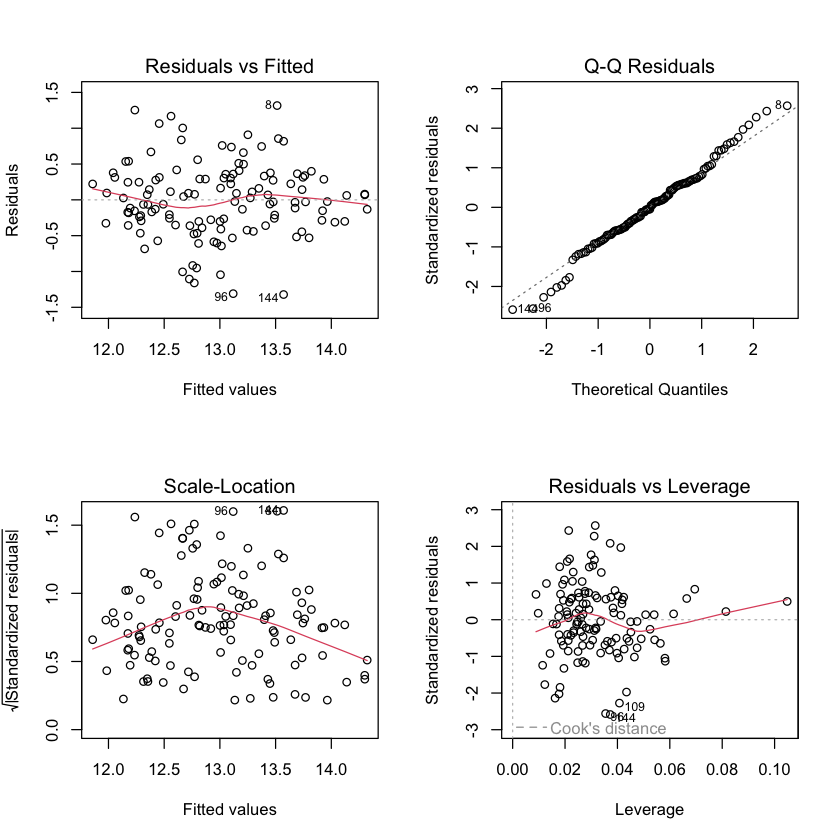

In [33]:
# Plot residuals
par(mfrow = c(2, 2))
plot(modPCA3)

In [34]:
# Thực hiện Shapiro-Wilk test
shapiro.test(modPCA3$residuals)


	Shapiro-Wilk normality test

data:  modPCA3$residuals
W = 0.98866, p-value = 0.3924


- Giá trị W: 0.98866 gần bằng 1 cho thấy rằng dữ liệu phần dư rất gần với phân phối chuẩn.
- p-value: 0.3924 lớn hơn mức ý nghĩa thông thường (0.05), do đó chúng ta không thể bác bỏ giả thuyết không rằng các phần dư có phân phối chuẩn.
- Kết quả của kiểm tra Shapiro-Wilk cho thấy rằng các phần dư của mô hình hồi quy tuyến tính modPCA3 có thể được coi là có phân phối chuẩn. Điều này là một dấu hiệu tích cực cho thấy mô hình có thể phù hợp và các giả định của hồi quy tuyến tính đã được đáp ứng.

### DỰ ĐOÁN

In [35]:
# Loại alcohol:
X_hat = subset(test.data, select = -c(alcohol))

In [36]:
newPredictors <- scale(X_hat, center = pca$center, scale = pca$scale) # Centered and scaled

In [37]:
newScores <- t(apply(newPredictors, 1,function(x) t(pca$loadings) %*% x))
newScores <- data.frame("Comp" = newScores)

In [38]:
predictions = predict(modPCA3, newdata = newScores, interval = "prediction")

In [39]:
df_result <- data.frame(
  actual = test.data$alcohol,
  predicted = predictions[, "fit"]
)

In [40]:
df_result

,actual,predicted
,<dbl>,<dbl>
1,13.20,13.57095
2,13.16,13.54237
4,13.24,13.21777
13,14.75,13.67897
16,14.30,13.83030
17,13.83,13.67556
21,12.93,13.10741
23,12.85,13.07986
24,13.50,12.84070


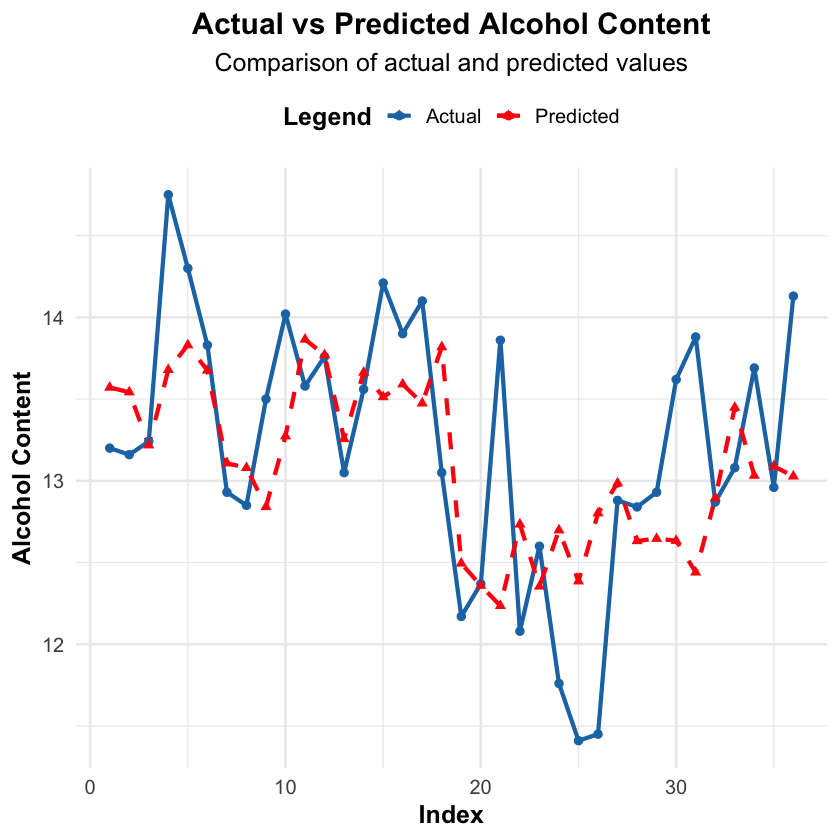

In [41]:
# Vẽ biểu đồ đường với ggplot2
ggplot(df_result, aes(x = 1:nrow(df_result))) +
  geom_line(aes(y = actual, color = "Actual"), size = 1.2) +
  geom_line(aes(y = predicted, color = "Predicted"), size = 1.2, linetype = "dashed") +
  labs(
    title = "Actual vs Predicted Alcohol Content",
    subtitle = "Comparison of actual and predicted values",
    x = "Index",
    y = "Alcohol Content",
    color = "Legend"
  ) +
  scale_color_manual(values = c("Actual" = "#1f77b4", "Predicted" = "#FF0E0E")) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.position = "top"
  ) +
  geom_point(aes(y = actual, color = "Actual"), size = 2) +
  geom_point(aes(y = predicted, color = "Predicted"), size = 2, shape = 17)

In [42]:
ss=RMSE(df_result$predicted, df_result$actual)
ss

[1] 0.6734261

In [43]:
summary(df_result$actual)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.41   12.87   13.18   13.21   13.84   14.75 

- RMSE = 0.67 là khá nhỏ so với phạm vi giá trị alcohol (từ 11.41 đến 14.75). Điều này cho thấy mô hình hồi quy có độ chính xác khá tốt trong việc dự đoán hàm lượng cồn
- Hiệu suất mô hình: Với RMSE = 0.67, mô hình hồi quy cho thấy khả năng dự đoán hàm lượng cồn khá chính xác. RMSE nhỏ hơn nhiều so với phạm vi giá trị của alcohol, điều này cho thấy sai số dự đoán của mô hình là khá nhỏ.
- Phân phối giá trị alcohol: Phân phối giá trị alcohol là đồng đều và không có nhiều giá trị ngoại lai, cho thấy dữ liệu đầu vào là hợp lý và không bị lệch quá nhiều.
- Tính hợp lý của mô hình: Cả kết quả kiểm tra Shapiro-Wilk và RMSE đều chỉ ra rằng mô hình hồi quy này là hợp lý và đáng tin cậy cho việc dự đoán hàm lượng cồn trong rượu.